In [31]:
#SETUP
#installing libraries

!pip install pandas numpy matplotlib seaborn wordcloud


In [32]:
#LOAD THE DATASET
import pandas as pd

# Load the dataset
data = pd.read_csv('netflix1.csv')

# Display the first few rows
print(data.head())


  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [33]:
#DATA CLEANING
# Check for missing values
print(data.isnull().sum())


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [37]:
#Drop rows with critical missing information
data.dropna(subset=['director', 'country'], inplace=True)

In [39]:
#Fill missing non-critical values with placeholders
data['rating'] = data['rating'].fillna('Not Rated')



In [41]:
#remove duplicates
data.drop_duplicates(inplace=True)


In [43]:
#convert datatypes
data['date_added'] = pd.to_datetime(data['date_added'])


In [45]:
#confirm datatypes 
print(data.dtypes)


show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [47]:
#EXPLANATORY DATA ANALYSIS
#Content Type Distribution (Movies vs. TV Shows)
import matplotlib.pyplot as plt
import seaborn as sns





In [49]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()



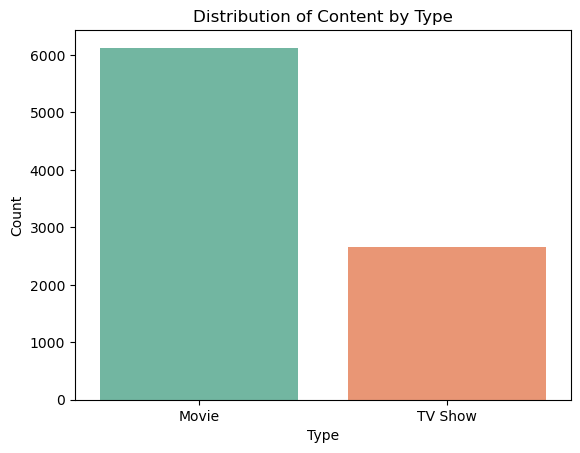

In [51]:
# Plot
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='Set2', legend=False)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

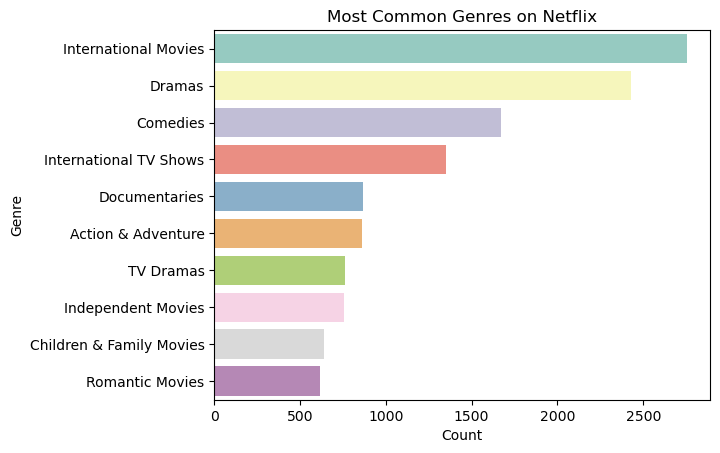

In [57]:
#MOST COMMON GENRE
import pandas as pd

# Convert to DataFrame for better compatibility
genre_df = genre_counts.reset_index()
genre_df.columns = ['Genre', 'Count']

# Plot
sns.barplot(data=genre_df, x='Count', y='Genre', palette='Set3', hue='Genre', dodge=False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend([], [], frameon=False)  # Removes redundant legend
plt.show()


In [59]:
#CONTENT TRENDS OVER TIME
#extract year and month
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month


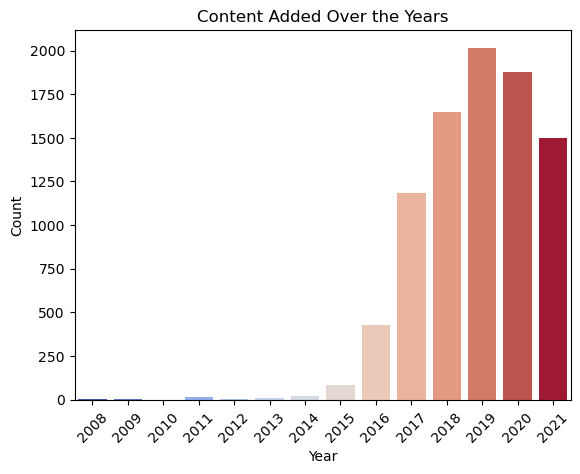

In [73]:
#PLOT YEARLY ADDITIONS
sns.countplot(x='year_added', data=data, palette='coolwarm', hue='year_added', dodge=False, legend=False)
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


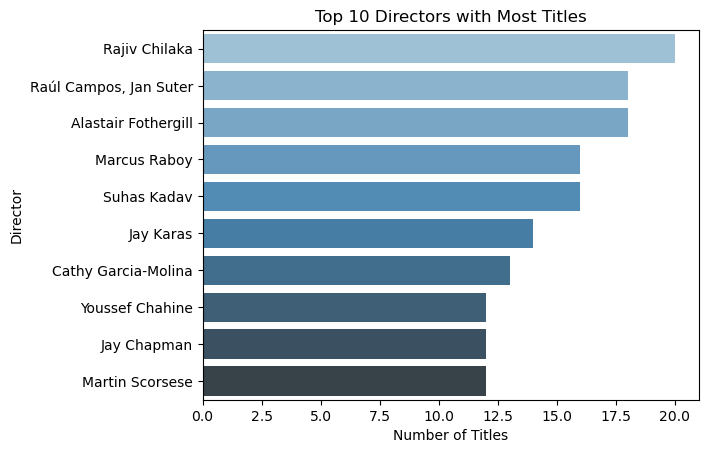

In [83]:
#TOP 10 DIRECTOR WITH MOST TITLES
# Exclude rows with 'Not Given' in the 'director' column
filtered_data = data[data['director'] != 'Not Given']

# Get the top 10 directors with the most titles
top_directors = filtered_data['director'].value_counts().head(10)

# Convert to DataFrame for plotting
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['Director', 'Titles']

# Plot
sns.barplot(data=top_directors_df, x='Titles', y='Director', palette='Blues_d', hue='Director', dodge=False, legend=False)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


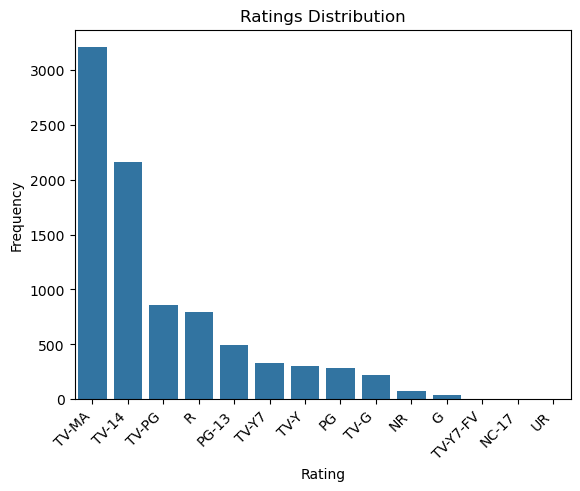

In [85]:
#RATING DISTRIBUTION
ratings = data['rating'].value_counts()

# Bar Plot
sns.barplot(x=ratings.index, y=ratings.values)
plt.xticks(rotation=45, ha='right')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


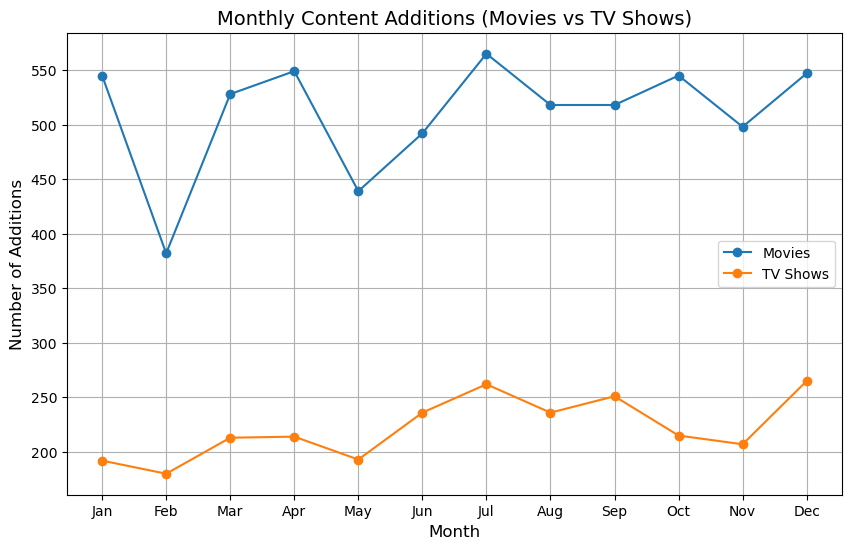

In [93]:
#VISUALISATION OF TRENDS
# Separate monthly releases for Movies and TV Shows
monthly_movie_releases = data[data['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_tv_releases = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_movie_releases.index, monthly_movie_releases.values, marker='o', label='Movies')
plt.plot(monthly_tv_releases.index, monthly_tv_releases.values, marker='o', label='TV Shows')

# Add titles and labels
plt.title('Monthly Content Additions (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Additions', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


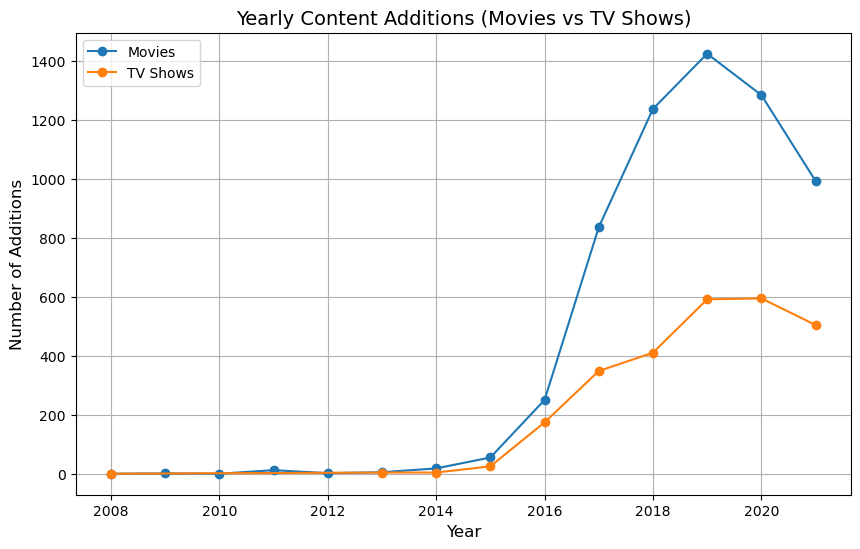

In [129]:
#YEARLY RELEASE
# Separate yearly releases for Movies and TV Shows
yearly_movie_releases = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_tv_releases = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, marker='o', label='Movies')
plt.plot(yearly_tv_releases.index, yearly_tv_releases.values, marker='o', label='TV Shows')

# Add titles and labels
plt.title('Yearly Content Additions (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Additions', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



<Figure size 1400x600 with 0 Axes>

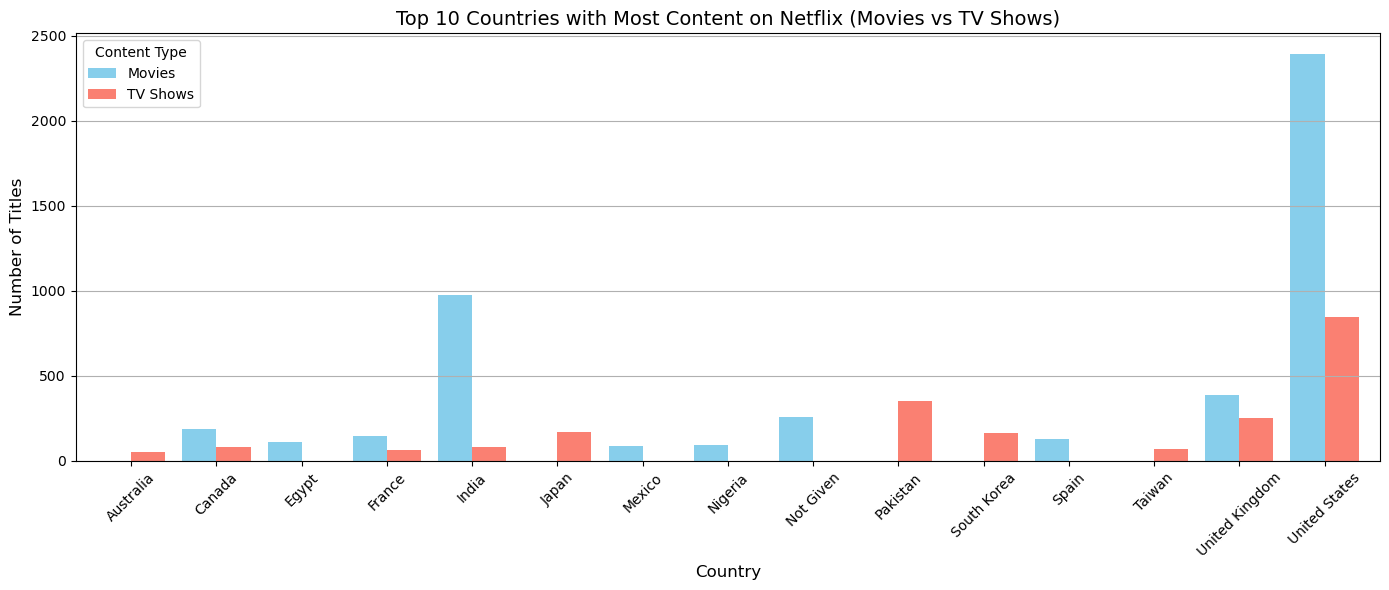

In [99]:
# Calculate top 10 countries for Movies and TV Shows
top_countries_movies = data[data['type'] == 'Movie']['country'].value_counts().head(10)
top_countries_shows = data[data['type'] == 'TV Show']['country'].value_counts().head(10)

# Merge the two datasets to align them for a grouped bar chart
top_countries_combined = pd.DataFrame({
    'Movies': top_countries_movies,
    'TV Shows': top_countries_shows
}).fillna(0)  # Fill NaN with 0 for alignment

# Plot the data
plt.figure(figsize=(14, 6))
top_countries_combined.plot(kind='bar', width=0.8, figsize=(14, 6), color=['skyblue', 'salmon'])

# Add titles and labels
plt.title('Top 10 Countries with Most Content on Netflix (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Content Type')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


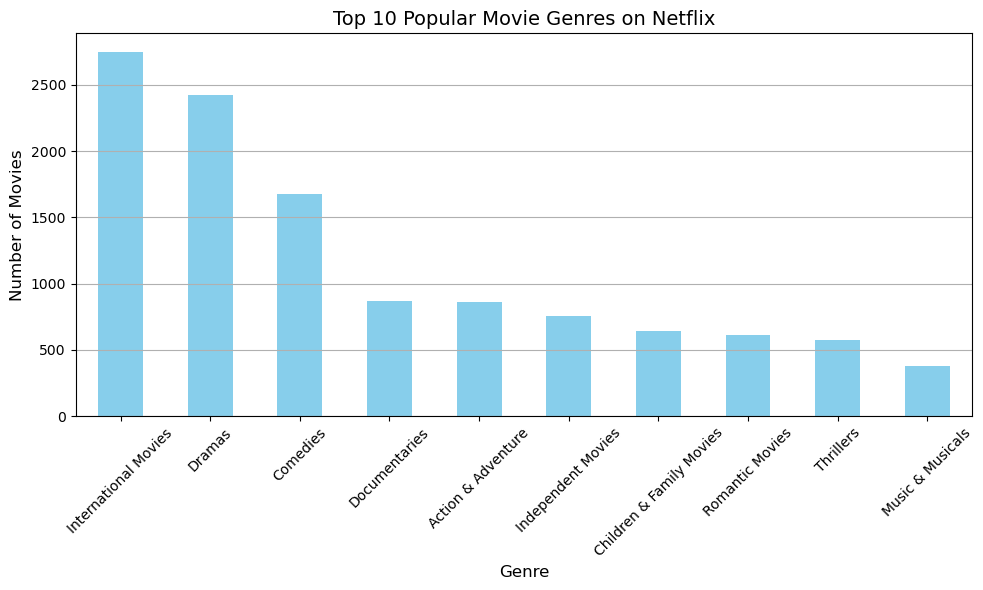

In [103]:
#TOP 10 POPULAR MOVIE GENRE
# Split genres for Movies and count the occurrences
movie_genres = data[data['type'] == 'Movie']['listed_in'].str.split(', ').explode()
top_movie_genres = movie_genres.value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_movie_genres.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Top 10 Popular Movie Genres on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


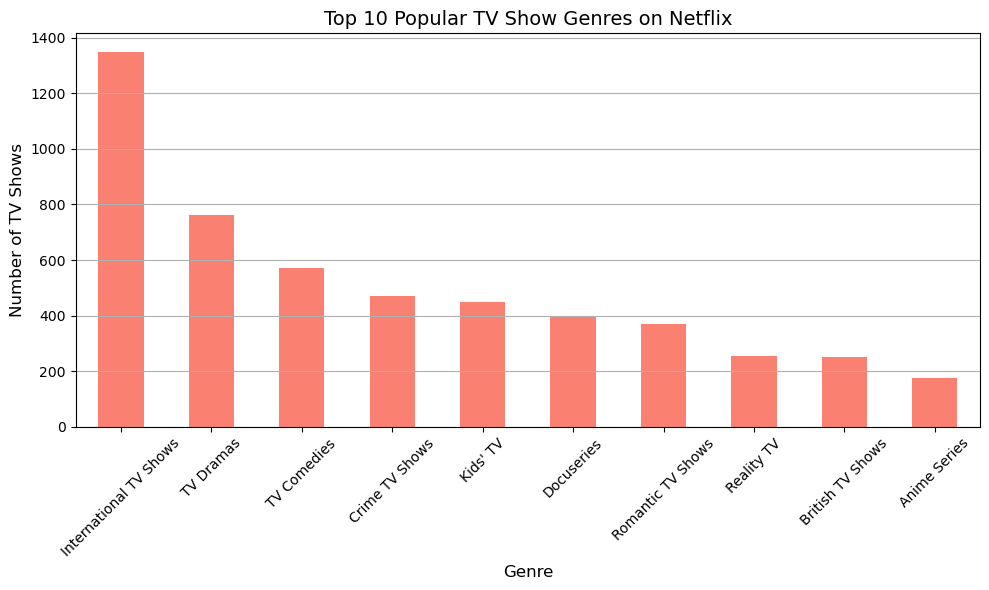

In [105]:
#TOP 10 TV SHOW GENRE
# Split genres for TV Shows and count the occurrences
tv_genres = data[data['type'] == 'TV Show']['listed_in'].str.split(', ').explode()
top_tv_genres = tv_genres.value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_tv_genres.plot(kind='bar', color='salmon')

# Add titles and labels
plt.title('Top 10 Popular TV Show Genres on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


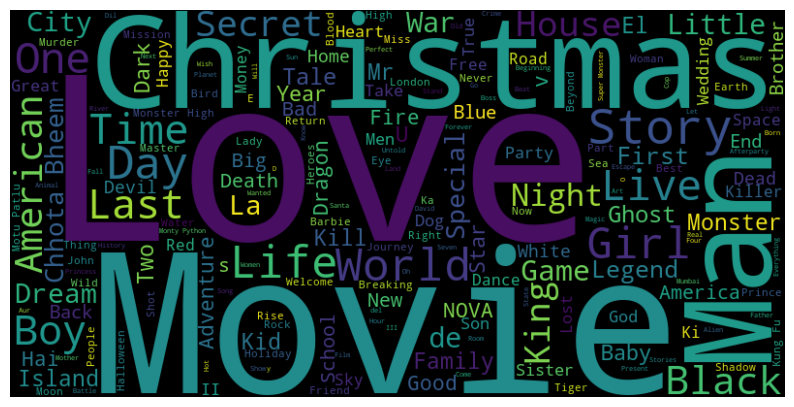

In [109]:
#WORD CLOUD OF MOVIE TITLES
from wordcloud import WordCloud

# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [115]:
#FEATURE ENGINEERING
# Extract additional temporal features
data['day_added'] = data['date_added'].dt.day
data['month_added'] = data['date_added'].dt.month
data['weekday_added'] = data['date_added'].dt.weekday
data['season_added'] = data['month_added'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else 'Fall'
)



In [117]:
#Machine Learning Applications
#Build a collaborative or content-based recommendation system.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example: Content-based recommendation based on genres
vectorizer = TfidfVectorizer()
genre_matrix = vectorizer.fit_transform(data['listed_in'])
similarity = cosine_similarity(genre_matrix)

# Recommend similar content for the first item
recommendations = sorted(
    list(enumerate(similarity[0])), key=lambda x: x[1], reverse=True
)[1:6]
print("Recommendations:", recommendations)


Recommendations: [(80, 1.0), (110, 1.0), (115, 1.0), (151, 1.0), (171, 1.0)]


In [121]:
#Trend Prediction
#Predict the type or popularity of new content
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data['genre_count'] = data['listed_in'].str.split(', ').apply(len)

# Prepare the data
X = data[['year_added', 'genre_count']]
y = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7102768297307547


In [127]:
# Save the cleaned DataFrame to a CSV file
data.to_csv('cleaned_data.csv', index=False)  # index=False prevents writing row numbers
